**Alumno**: Cynthia Marcela Villagra\
**Profesor**: Matías Barreto\
**Materia**: Técnicas de Procesamiento Digital de Imágenes\
**Año**: 2025\
**Instituto**: IFTS 24 \

**Actividad de laboratorio**
---

En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:



#1 ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [ ]:
'''
PASO 1: IMPORTAR LIBRERIAS

En este paso utilizo tres librerias
Por un lado OPENCV que es una libreria de python que sirve para el procesamiento digital de imagenes
Por otro lado MATPLOTLIB, que es una libreria que sirve para graficar, por ejemplo funciones, histogramas, etc
En este caso particular la usamos para graficar la imagen pixel por pixel
Por ultimo, usamos NUMPY que es la libreria que nos permite trabajar las imagenes como un array multidimensional
y hacer operaciones facilmente

'''

import cv2 #libreria OpenCV para procesamiento de imagenes
import matplotlib.pyplot as plt #para graficar / visualizar imagenes
import numpy as np #para trabajar las imagenes como arrays
from ipywidgets import interact, IntSlider # la uso para detectar el rango de color rojo


#2 Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [ ]:
!wget https://images.unsplash.com/photo-1620279206195-1c13eb32d592?q=80&w=1471&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D

--2025-05-01 18:58:40--  https://images.unsplash.com/photo-1620279206195-1c13eb32d592?q=80
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1588149 (1.5M) [image/jpeg]
Saving to: ‘photo-1620279206195-1c13eb32d592?q=80’

photo-1620279206195 100%[===================>]   1.51M  --.-KB/s    in 0.05s   

2025-05-01 18:58:41 (31.0 MB/s) - ‘photo-1620279206195-1c13eb32d592?q=80’ saved [1588149/1588149]



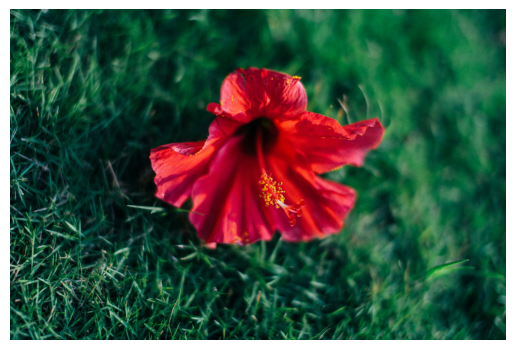

In [ ]:
'''
PASO2: LEER Y VER LA IMAGEN

Mi objetivo en este paso es visualizar la imagen.
Estoy usando la libreria OpenCV.
Para "leer" la imagen utilizo la funcion imread. Lo que hace esta libreria es convertir la imagen en un array de Numpy
Tener en cuenta que esta funcion (imread) toma una imagen RGB y la convierte en BGR
Esto es porque la libreria por dentro trabaja con BGR y no RGB

Pero sabemos que Matplotlib trabaja en RGB
Asi que lo que hacemos en convertir la imagen de BGR a RGB usando la funcion cvtColor de la libreria OpenCV

Ahora que estan en un orden que Matplotlib puede entender, visualizamos la imagen con Matplotlib

'''

#La imagen original es RGB

#leo la imagen (imread la va a convertir de rgb a bgr)
imagen_bgr = cv2.imread('photo-1620279206195-1c13eb32d592?q=80')

#la convierto en rgb para Matplotlib
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)
plt.axis('off')
plt.show()

#3 ¡Mejorando nuestra imagen!


Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

##3.1 Ajuste de brillo y contraste

In [ ]:
'''
PASO 3: AJUSTE DE BRILLO Y CONTRASTE

En este punto lo que queremos es ajustar el brillo y contraste de una imagen
Tenemos dos opciones validas, una es convertir la imagen en HSV (tono, saturacion, brillo)
y la otra es usar la funcion convertScaleAbs de OpenCV

Que formato espera convertScaleAbs?
Esta funcion espera que la imagen este en BGR, RGB o escala de grises

Que hace la funcion convertScaleAbs?
Basicamente lo que hace es que agarra cada pixel y hace una operacion matematica sobre el.

Pero antes repasar algunos conceptos importantes:


=========================================================================================

CONTRASTE
=========

Que es el contraste: se refiere a la diferencia entre los valores claros y oscuros

Se aumenta o disminuye MULTIPLICANDO o DIVIDIENDO el valor de cada pixel por un número constante
Si se aumenta el contraste significa que se aumenta la diferencia entre los claros y los oscuros

Como se si esta bien de contraste? se calcula asi:
Contraste ≈ valor máximo de brillo - valor mínimo de brillo
si esta cuenta da como resultado entre 30 y 220 decimos que tiene buen contraste

Como aumento el contraste? Multiplico cada pixel por un numero
PIXEL = VALOR_ORIGINAL * NUMERO

Como disminuyo el contraste? Divido cada pixel por un numero
PIXEL = VALOR_ORIGINAL / NUMERO

Ejemplo:
- píxel oscuro → valor bajo (ej. 30, 50)
- píxel medio → valor intermedio (ej. 128)
- píxel claro → valor alto (ej. 200 o más)

Tomo 3 pixeles de ejemplo de una imagen:
pixel oscuro:10
pixel medio:128
pixel claro:210

Los multiplico por 2: (aumento el contraste)
pixel oscuro:20
pixel medio:256
pixel claro:420

o los divido por 2: (disminuyo el contraste)
pixel oscuro:5
pixel medio:64
pixel claro:105

En estos dos ejemplos se puede ver claramente.

Si yo multiplico todos los pixeles por 2, la diferencia entre un pixel claro y un pixel oscuro aumenta.
El original tenia de diferencia 200 entre claro y oscuro
Al multiplicarlo la diferencia aumento a 400
Es decir, AUMENTO el contraste

En cambio, si divido todos los pixeles por 2, la diferencia entre un pixel claro y un pixel oscuro disminuye
El original tenia de diferencia 200 entre claro y oscuro
Al dividirlo la diferencia disminuyo a 100
Es decir, DISMINUYO el contraste

PERO OJO!!! Al hacer esta operacion puede dar numeros negativos o numeros mayores a 255

=========================================================================================

BRILLO
======

¿Qué es el brillo?
El brillo se refiere a qué tan clara u oscura se ve una imagen en general.
Aumentar el brillo significa que todos los pixeles suben su valor (se aclaran TODOS).
Disminuir el brillo significa que todos los pixeles bajan su valor (se oscurecen TODOS).

Como se si la imagen tiene uyn brillo aceptable, esta muy clara o muy oscura?
Saco el promedio y evaluo el valor:

imagen_gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
brillo_promedio = np.mean(imagen_gris)

Si esta entre 81 y 150 esta aceptable. Menos que eso la imagen esta oscura! Mas que eso, la imagen esta muy clara!

El brillo se ajusta SUMANDO O RESTANDO un valor constante a todos los píxeles.
La formula es: nuevo_valor = valor_original + numero constante

Ejemplo:
- píxel oscuro → valor bajo (ej. 10)
- píxel medio → valor intermedio (ej. 128)
- píxel claro → valor alto (ej. 210)

Tomo 3 píxeles de ejemplo de una imagen:
pixel oscuro: 10
pixel medio: 128
pixel claro: 210

Le sumo 50 a todos (aumento el brillo):
pixel oscuro: 10 + 50 = 60
pixel medio: 128 + 50 = 178
pixel claro: 210 + 50 = 260

Le resto 50 a todos (disminuyo el brillo):
pixel oscuro: 10 - 50 = -40
pixel medio: 128 - 50 = 78
pixel claro: 210 - 50 = 160

En estos dos ejemplos se puede ver claramente.

Si yo sumo un número positivo a todos los píxeles, la imagen se aclara (más brillo).
Si resto un número, la imagen se oscurece (menos brillo).

La diferencia entre los píxeles (contraste) SE MANTIENE CASI IGUAL.
Lo que cambia es que todos los valores SE DESPLAZAN hacia arriba o hacia abajo.

PERO OJO!!! Al hacer esta operación pueden dar números negativos o mayores a 255,
lo cual no es válido

=========================================================================================

funcion CONVERTSCALEABS
========================

Esta funcion va a recibir tres parametros:
- La imagen
- Alpha (valor que controla el contraste)
- Beta (valor que controla el brillo)

Pero la libreria como sabe si sumar, restar, multiplicar o dividir???

CONTRASTE: ALPHA siempre MULTIPLICA. Entonces ALPHA=2 multiplica por 2 a cada pixel.
Pero si queremos dividir por 2, entonces tendriamos que usar ALPHA=0,5
Si queremos dejar el contraste tal como esta, entonces tendriamos que usar ALPHA=1

BRILLO: BETA siempre SUMA. Entonces BETA=20 suma 20 a cada pixel.
Pero si queremos restar 20, entonces tendriamos que usar BETA=-20
Si queremos dejar el brillo tal como esta, entonces tendriamos que usar BETA=0



Y como hace la libreria para que no de negativo ni fuera de rango 0 a 255???

1ero aplica la formula:                                      resultado = alpha * pixel + beta
2do: aplica valor absoluto(para que sea siempre positivo):   resultado = abs(resultado)
3ro: aplica clip (para que siempre este dentro del rango):   resultado = np.clip(resultado, 0, 255)
4to: convierte la imagen a uint8:                            resultado = resultado.astype(np.uint8)

'''




'\nPASO 3: AJUSTE DE BRILLO Y CONTRASTE\n\nEn este punto lo que queremos es ajustar el brillo y contraste de una imagen\nTenemos dos opciones validas, una es convertir la imagen en HSV (tono, saturacion, brillo) \ny la otra es usar la funcion convertScaleAbs de OpenCV\n\nQue formato espera convertScaleAbs?\nEsta funcion espera que la imagen este en BGR, RGB o escala de grises\n\nQue hace la funcion convertScaleAbs?\nBasicamente lo que hace es que agarra cada pixel y hace una operacion matematica sobre el.\n\nPero antes repasar algunos conceptos importantes:\n\n\n=========================================================================================\n\nCONTRASTE\n=========\n\nQue es el contraste: se refiere a la diferencia entre los valores claros y oscuros\n\nSe aumenta o disminuye MULTIPLICANDO o DIVIDIENDO el valor de cada pixel por un número constante\nSi se aumenta el contraste significa que se aumenta la diferencia entre los claros y los oscuros\n\nComo se si esta bien de contra

Primero voy a evaluar la imagen, que tal esta de contraste y de brillo
Luego voy a tratar de ajustarla con la funcion convertScaleAbs y los parametros alfa y beta
Por ultimo vuelvo a evaluar a ver si mejoró la imagen


In [ ]:
# Función para evaluar el brillo general de la imagen
def evaluar_brillo(imagen_bgr):
    imagen_gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
    brillo_promedio = np.mean(imagen_gris)

    if brillo_promedio < 81:
        estado = "La imagen está oscura"
    elif brillo_promedio > 150:
        estado = "La imagen está muy clara"
    else:
        estado = "La imagen tiene un brillo aceptable"

    return brillo_promedio, estado

In [ ]:
# Función para evaluar el contraste de la imagen
def evaluar_contraste(imagen_bgr):
    imagen_gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
    valor_min = np.min(imagen_gris)
    valor_max = np.max(imagen_gris)
    contraste = valor_max - valor_min

    if contraste < 30:
        estado = "La imagen tiene bajo contraste"
    elif contraste > 220:
        estado = "La imagen tiene demasiado contraste"
    else:
        estado = "La imagen tiene un contraste aceptable"

    return contraste, estado

In [ ]:
evaluar_brillo(imagen_bgr)

(np.float64(56.90933231277938), 'La imagen está oscura')

In [ ]:
evaluar_contraste(imagen_bgr)


(np.uint8(236), 'La imagen tiene demasiado contraste')

In [ ]:
#Esta funcion es para ajustar brillo y contraste

# alpha = CONTRASTE mayor a 0 aumenta, menor a 0 disminuye, 1 queda igual (porque multiplica)
# beta = BRILLO mayor a 1.  aumenta, entre 0 y 1 disminuye, 0 queda igual (porque suma)

def ajustar_brillo_contraste(img, alpha, beta):
    img_ajustada = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img_ajustada

In [ ]:
#ajusto el brillo y el contraste con la funcion
#en la evaluacion me salia que la imagen tenia poco brillo y demasiado contraste
#asi que aumento brillo y disminuyo el contraste

imagen_ajustada_bgr = ajustar_brillo_contraste(imagen_bgr, alpha=1, beta=30)

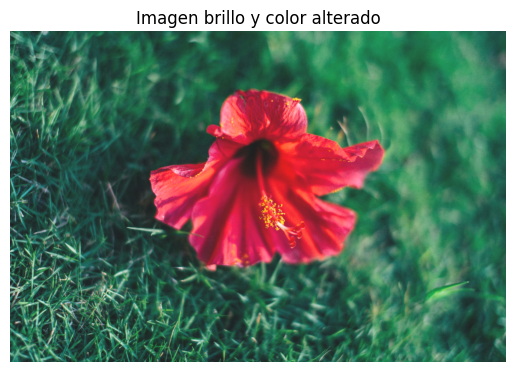

In [ ]:
#ver rgb en matplotlib
#convertir BGR en RGB y ver
imagen_ajustada_rgb = cv2.cvtColor(imagen_ajustada_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_ajustada_rgb)
plt.axis('off')
plt.title('Imagen brillo y color alterado')
plt.show()

In [ ]:
evaluar_contraste(imagen_ajustada_bgr)


(np.uint8(225), 'La imagen tiene demasiado contraste')

In [ ]:
evaluar_brillo(imagen_ajustada_bgr)

(np.float64(86.7350697446574), 'La imagen tiene un brillo aceptable')

##3.1 Ecualizacion del histograma

In [ ]:
'''
QUE HACE LA FUNCION EQUALIZEHIST() DE OPENCV?

Esta funcion lo que hace es mejorar el contraste

Como lo hace?
Redistribuye los valores para que ocupen mejor el rango de valores en vez de concentrarse en un solo lugar

'''

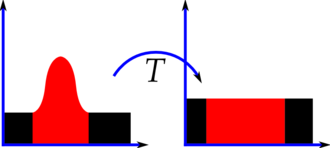

In [ ]:
'''

IMPORTANTE: esta funcion solo funciona en un solo canal!!
Es decir que debe usarse en imagenes en escala de grises o en HSV

No se puede separar en canales r,g y b y ecualizar cada canal por separado?
De poder, se puede, lo que ocurre es que la imagen queda con colores raros. No se recomienda
Lo recomendado es usar HSV, sobre el cual se ecualiza V

Que hace la libreria por dentro?
===============================
A cada pixel le aplica la formula CDF, de manera que el resultado final es una distribucion mas uniforme

Para usar la libreria tengo que:
1ro: convertir a HSV la imagen
2do: ecualizar el canal V sobre la imagen (NO SEPARO LOS CANALES, TRABAJO DIRECTAMENTE SOBRE ESE CANAL. Es decir, NO NECESITO DESUNIR Y UNIR LOS CANALES)
3ro: volver a RGB la imagen para visualizar con Matplotlib

'''

La fórmula de ecualización usa la distribución acumulada del histograma para reasignar los valores de los píxeles, estirándolos al rango 0–255. Así mejora el contraste de manera automática.”

## 📐 Fórmula de ecualización de histograma

La ecualización transforma cada píxel \( x \) original en un nuevo valor \( x' \) usando:

$$
x' = \text{round}\left( \frac{\text{CDF}(x) - \text{CDF}_\text{min}}{N - \text{CDF}_\text{min}} \times (L - 1) \right)
$$


---

### 📌 ¿Qué significa cada cosa?

| Símbolo           | Significado                                                            |
|-------------------|------------------------------------------------------------------------|
| \( x \)           | Valor original del píxel (entre 0 y 255)                               |
| \( x' \)          | Nuevo valor del píxel luego de ecualizar                               |
| **CDF(x)**        | Función de distribución acumulada para el valor \( x \)                |
| **CDF_min**       | Primer valor distinto de cero en la CDF (evita que el fondo quede negro) |
| \( N \)           | Número total de píxeles en la imagen                                   |
| \( L \)           | Número de niveles posibles (en 8 bits: 256 → de 0 a 255)               |

---

## 🧠 ¿Qué hace esta fórmula?

- Toma la **distribución acumulada** del histograma.
- La **normaliza** al rango [0, 255].
- Usa esa información para **asignar nuevos valores** de brillo a los píxeles.
- Así logra que los valores estén **más distribuidos** → mejora el **contraste**.

---

## 🧪 Ejemplo con una imagen oscura:

Supongamos que la mayoría de los valores están entre 30 y 100.  
Después de aplicar la fórmula, los valores se extienden por todo el rango 0–255, generando más contraste visual.

---


In [ ]:
#convierto a hsv para poder ecualizar

imagen_hsv_1 = cv2.cvtColor(imagen_ajustada_bgr, cv2.COLOR_BGR2HSV)

# Guardar una copia del canal V original antes de ecualizar
v_original = imagen_hsv_1[:, :, 2].copy()

#ecualizo canal V sobre la imagen
v_ecualizado = imagen_hsv_1[:, :, 2]= cv2.equalizeHist(imagen_hsv_1[:, :, 2])  # Ecualiza el canal


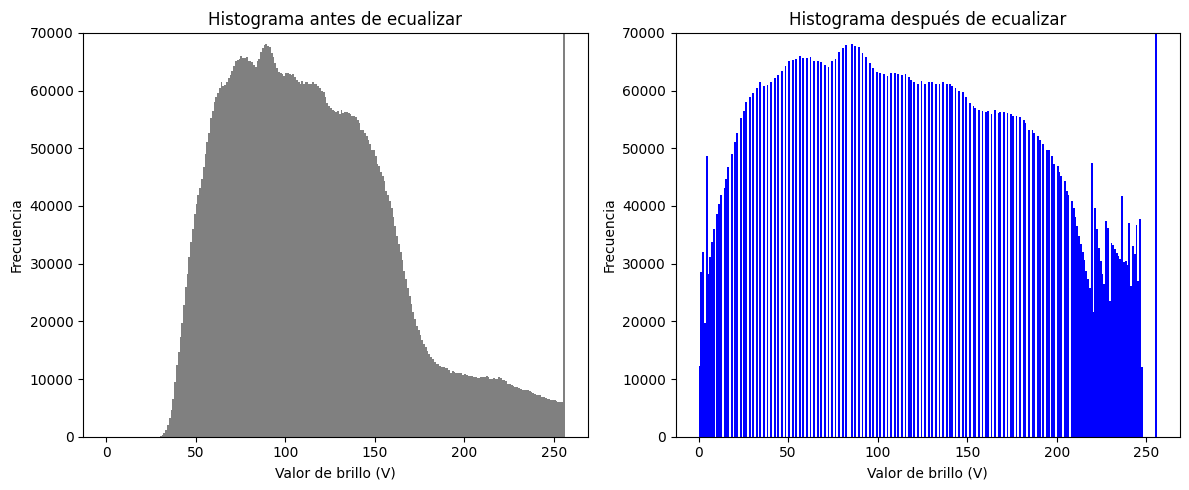

In [ ]:
# Mostrar histogramas del canal V antes y después de ecualizar

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(v_original.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histograma antes de ecualizar')
plt.xlabel('Valor de brillo (V)')
plt.ylabel('Frecuencia')
plt.ylim(0, 70000)  # Limitar eje Y

plt.subplot(1, 2, 2)
plt.hist(v_ecualizado.ravel(), bins=256, range=[0, 256], color='blue')
plt.title('Histograma después de ecualizar')
plt.xlabel('Valor de brillo (V)')
plt.ylabel('Frecuencia')
plt.ylim(0, 70000)  # Limitar eje Y

plt.tight_layout()
plt.show()


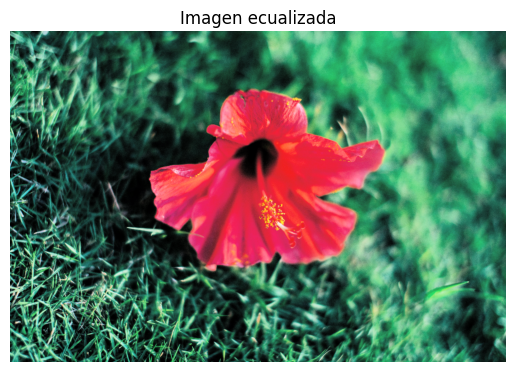

In [ ]:
#convierto imagen ecualizada HSV a BGR, para usarla luego si la necesito
imagen_ecualizada_bgr = cv2.cvtColor(imagen_hsv_1, cv2.COLOR_HSV2BGR)

#ver en matplotlib (primero convierto de HSV a RGB, despues visualizo)
imagen_ecualizada_rgb = cv2.cvtColor(imagen_hsv_1, cv2.COLOR_HSV2RGB)

#ver rgb en matplotlib
plt.imshow(imagen_ecualizada_rgb)
plt.axis('off')
plt.title('Imagen ecualizada')
plt.show()

#4 ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

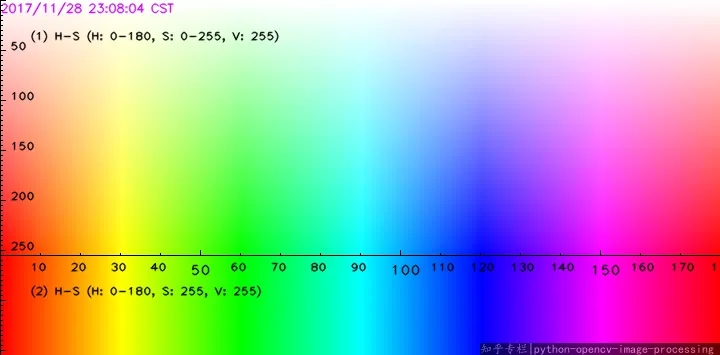

In [ ]:
'''
En esta imagen de arriba se puede ver los colores representados en el eje X, del 0 al 179

X= hue (tono)
Y= s (saturación)

en la imagen el brillo esta fijo en 255

'''

In [ ]:
'''

¿POR QUE USAMOS DOS RANGOS DE COLOR PARA DETECTAR EL ROJO EN HSV?
==================================================================

En HSV, sabemos que H es el tono o color
El color en HSV se representa del 0 al 179
El circulo de HSV se puede representar de esta manera:

0         30       60        90       120      150     179
|---------|--------|---------|--------|--------|--------|
rojo     amarillo  verde     cian     azul     violeta  rojo otra vez


Nosotros queremos aislar el rango donde se encuentra el color rojo.
PERO... como vemos en la imagen el color rojo se encuentra en dos lados!
Al principio y al final
- Cerca de 0 (rojo puro)
- Y cerca de 179 (rojo hacia el otro extremo del circulo)
Entonces por eso vamos a determinar dos rangos

IMPORTANTE: esto solo pasa con el color ROJO
con los otros colores si se puede determinar un solo rango

'''

'\n\n¿POR QUE USAMOS DOS RANGOS DE COLOR PARA DETECTAR EL ROJO EN HSV?\n==================================================================\n\nEn HSV, sabemos que H es el tono o color\nEl color en HSV se representa del 0 al 179\nEl circulo de HSV se puede representar de esta manera:\n\n0         30       60        90       120      150     179\n|---------|--------|---------|--------|--------|--------|\nrojo     amarillo  verde     cian     azul     violeta  rojo otra vez\n\n\nNosotros queremos aislar el rango donde se encuentra el color rojo.\nPERO... como vemos en la imagen el color rojo se encuentra en dos lados!\nAl principio y al final\n- Cerca de 0 (rojo puro)\n- Y cerca de 179 (rojo hacia el otro extremo del circulo)\nEntonces por eso vamos a determinar dos rangos\n\nIMPORTANTE: esto solo pasa con el color ROJO\ncon los otros colores si se puede determinar un solo rango\n\n'

In [ ]:
'''
COMO ENCUENTRO EL RANGO EXACTO??
Usé la libreria interact para que por medio de sliders, poder determinar el color exacto de manera visual

Va a crear dos sliders de color rojo por lo que expliqué antes.

dos sliders de color maximo, color minimo que esos son los que voy a ajustar manualmente

Luego voy a dejar fijo el V y el S entre 100 y 255
Comprobar que si bajo de esos valores la S o la V, aparece ruido gris

s_min = 100  # Evita colores lavados o grises
v_min = 100  # Evita sombras o zonas muy oscuras

'''

In [ ]:
from ipywidgets import interact, IntSlider

# Imagen a ecualizar y segmentar (ya cargada en BGR)
# Debe estar en una variable llamada imagen_bgr o imagen_ecualizada_bgr

def segmentar_color_interactivo(h1_min, h1_max, h2_min, h2_max, s_min, s_max, v_min, v_max):
    hsv = cv2.cvtColor(imagen_ecualizada_bgr, cv2.COLOR_BGR2HSV)

    # Primer rango del rojo
    rojo_bajo1 = np.array([h1_min, s_min, v_min])
    rojo_alto1 = np.array([h1_max, s_max, v_max])

    # Segundo rango del rojo
    rojo_bajo2 = np.array([h2_min, s_min, v_min])
    rojo_alto2 = np.array([h2_max, s_max, v_max])

    # Crear mascaras
    mascara1 = cv2.inRange(hsv, rojo_bajo1, rojo_alto1)
    mascara2 = cv2.inRange(hsv, rojo_bajo2, rojo_alto2)
    mascara = cv2.bitwise_or(mascara1, mascara2)

    # Aplicar mascara
    resultado = cv2.bitwise_and(imagen_ecualizada_bgr, imagen_ecualizada_bgr, mask=mascara)

    # Mostrar
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_ecualizada_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
    plt.title("Segmentado")
    plt.axis("off")
    plt.show()

# Sliders interactivos para probar rangos
interact(
    segmentar_color_interactivo,
    h1_min=IntSlider(0, 0, 30, 1, description='H1 min'),
    h1_max=IntSlider(10, 0, 30, 1, description='H1 max'),
    h2_min=IntSlider(160, 150, 179, 1, description='H2 min'),
    h2_max=IntSlider(179, 150, 179, 1, description='H2 max'),
    s_min=IntSlider(100, 0, 255, 5, description='S min'),
    s_max=IntSlider(255, 0, 255, 5, description='S max'),
    v_min=IntSlider(100, 0, 255, 5, description='V min'),
    v_max=IntSlider(255, 0, 255, 5, description='V max'),
)


interactive(children=(IntSlider(value=0, description='H1 min', max=30), IntSlider(value=10, description='H1 ma…

<function __main__.segmentar_color_interactivo(h1_min, h1_max, h2_min, h2_max, s_min, s_max, v_min, v_max)>

In [ ]:
'''

Funcion inRange: cv2.inRange(imagen, limite_inferior, limite_superior)
===============

La funcion cv2.inRange sirve para crear una MASCARA BINARIA.

¿Que hace?
- Recorre cada pixel de la imagen y verifica si esta dentro del rango de colores que le indicas.
- Si el pixel esta dentro del rango : lo pone en blanco (255) en la mascara.
- Si esta fuera del rango : lo pone en negro (0).

Cuando el color a segmentar se encuentra en dos partes del espacio de color (como el rojo en HSV),
se necesitan dos rangos:

Ejemplo:
- rojo_bajo1 = np.array([0, 100, 100])
- rojo_alto1 = np.array([10, 255, 255])
- rojo_bajo2 = np.array([160, 100, 100])
- rojo_alto2 = np.array([179, 255, 255])

Luego se crean dos mascaras:
- mascara1 = cv2.inRange(imagen_hsv, rojo_bajo1, rojo_alto1)
- mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2)

Finalmente se combinan:
- mascara_total = cv2.bitwise_or(mascara1, mascara2)

Esto da como resultado una imagen binaria donde las zonas que contienen rojo estan en blanco y el resto en negro.

=====================================================================

Funcion bitwise_and : cv2.bitwise_and(imagen, imagen, mask=mascara)
===================

La funcion cv2.bitwise_and sirve para aplicar una MASCARA sobre una imagen.

¿Que hace?
- Deja visibles solo los pixeles que estan en la zona blanca (255) de la mascara.
- Los pixeles que estan en negro (0) se ocultan (se reemplazan por negro en la imagen de salida).

Se usa para "recortar" o aislar una parte de la imagen que nos interesa, como por ejemplo un objeto de cierto color.

Ejemplo completo:
1) Usas inRange() dos veces para detectar ambos rangos del color rojo.
2) Usas bitwise_or() para combinar ambas mascaras.
3) Usas bitwise_and() para quedarte solo con los pixeles rojos de la imagen original.

Resultado: una imagen con fondo negro y solo los objetos rojos visibles.
'''

In [ ]:
'''
Esta funcion aplica la mascara a la imagen original
(es decir el resultado final es que el color que qiero se ve
y todo lo que no es de ese color lo transforma a color negro)
'''

def aplicar_mascara_rojo(imagen_bgr, h1_min, h1_max, h2_min, h2_max, s_min, s_max, v_min, v_max):
    imagen_hsv = cv2.cvtColor(imagen_ecualizada_bgr, cv2.COLOR_BGR2HSV)

    rojo_bajo1 = np.array([h1_min, s_min, v_min])
    rojo_alto1 = np.array([h1_max, s_max, v_max])
    rojo_bajo2 = np.array([h2_min, s_min, v_min])
    rojo_alto2 = np.array([h2_max, s_max, v_max])

    mascara1 = cv2.inRange(imagen_hsv, rojo_bajo1, rojo_alto1) #determino rango de color rojo 1
    mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2) #determino rango de color rojo 2
    mascara_rojo = cv2.bitwise_or(mascara1, mascara2) # todo lo que entre dentro de los dos rangos juntos lo llamo mascara_rojo

    resultado = cv2.bitwise_and(imagen_ecualizada_bgr, imagen_ecualizada_bgr, mask=mascara_rojo) #muestra color original lo que esta DENTRO de la mascara y negro lo que esta FUERA de la mascara

    return resultado, mascara_rojo




In [ ]:
'''
esta funcion primero segmenta y luego muestra la segmentacion con matplotlib
'''


def ejercicio_segmentar_y_mostrar():
    # Segmentar el color rojo
    resultado, _ = aplicar_mascara_rojo(
        imagen_ecualizada_bgr,
        h1_min=0, h1_max=10,
        h2_min=160, h2_max=179,
        s_min=100, s_max=255,
        v_min=100, v_max=255
    )

    # Convertir a RGB para mostrar
    imagen_original_rgb = cv2.cvtColor(imagen_ecualizada_bgr, cv2.COLOR_BGR2RGB)
    resultado_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)

    # Mostrar original y segmentada
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_original_rgb)
    plt.title("Imagen original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(resultado_rgb)
    plt.title("Flor segmentada (fondo negro)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


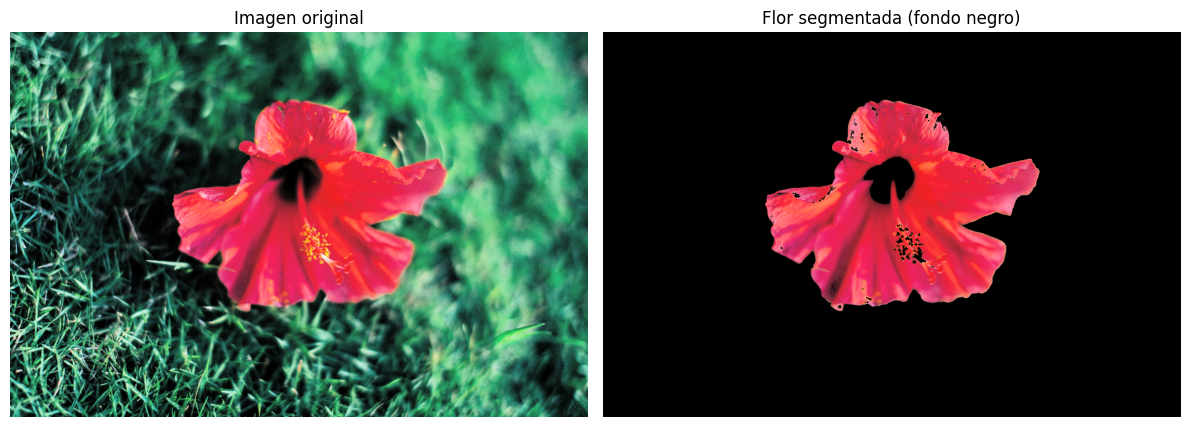

In [ ]:
ejercicio_segmentar_y_mostrar()

#5 ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

In [ ]:
'''
Deteccion de contornos y dibujo de rectangulos
==============================================

Una vez que tenemos una mascara binaria (por ejemplo, segmentada por color con inRange),
podemos detectar la forma de los objetos y dibujar rectangulos alrededor de ellos.

1) cv2.findContours()
----------------------
Sirve para encontrar los contornos (bordes) de los objetos blancos en una imagen binaria.
Esta funcion devuelve una lista de arrays.
Cada array es un objeto blanco, y cada elemento de ese array es un punto que describe el contorno.

Ejemplo:
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

- "mascara" es la imagen binaria (con fondo negro y objetos en blanco)
- "contornos" es una lista de puntos que describen cada figura encontrada
- RETR_EXTERNAL: Este parametro indica que solo queremos detectar los bordes externos e ignora los huecos internos
- CHAIN_APPROX_SIMPLE: Este parametro indica que solo queremos los puntos extremos de cada contorno

=================================================================================

2) cv2.boundingRect()
----------------------
Sirve para obtener un rectangulo que encierre a cada contorno.
Me devuelve 4 datos, el x e y representan el punto de partida, el w y h representan el ancho y alto del contorno

Ejemplo:
    x, y, w, h = cv2.boundingRect(contorno)

Devuelve:
- x, y → coordenadas del punto superior izquierdo
- w, h → ancho y alto del rectangulo

=================================================================================


3) cv2.rectangle()
-------------------
Dibuja un rectangulo sobre una imagen.
Le paso como parametros la imagen, punto de partida, punto donde temrina el ancho, punto donde termina el largo, color del borde y grosor del borde
Parametros:
- La imagen donde se dibuja
- Punto inicial y final
- Color del borde (en BGR)
- Grosor del borde (2 px en este caso)

Ejemplo:
    cv2.rectangle(imagen, (x, y), (x + w, y + h), (0, 255, 0), 2)

Resultado: aparece un recuadro sobre el objeto detectado.

=================================================================================

Agregar texto con putText()
===========================

La funcion cv2.putText() permite escribir un texto sobre una imagen.

Parametros:
- La imagen donde se escribe
- El texto
- Posicion (x, y)
- Fuente
- Tamaño del texto
- Color (en BGR)
- Grosor del texto

Ejemplo:
    cv2.putText(imagen, "Objeto detectado", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

Resultado: aparece una etiqueta o texto sobre el objeto segmentado.

'''


In [ ]:
'''
Esta funcion le paso una mascara y una imagen y me dibuja un rectangulo sobre la imagen

'''
def dibujar_rectangulo(imagen_bgr, mascara_binaria):
    contornos, _ = cv2.findContours(mascara_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Find Countours encuentra los bordes del objeto (lo que no es negro) y solo el borde externo ignorando los huecos de adentro
    #Aca lo que esta haciendo es crear un array de puntos que representan a los contornos

    imagen_con_info = imagen_bgr.copy()

    if contornos:
        contorno_principal = max(contornos, key=cv2.contourArea) # de los contornos encontrados, elegi el mas exterior
        x, y, w, h = cv2.boundingRect(contorno_principal) #carlcula las coordenadas del contorno. empieza en X,y y luego esta el ancho (w) y largo (h)
        cv2.rectangle(imagen_con_info, (x, y), (x + w, y + h), (0, 255, 0), 35)  #usando las coordenadas, dibuja un rectangulo de grosor 15)
        cv2.putText(imagen_con_info, 'Flor roja detectada', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 8.0, (255, 255, 255), 22) #poner texto, le paso las coordenadas, tipo de fuente, tamaño color y grosor de las letras
    return imagen_con_info

In [ ]:
'''

esta funcion primero segmenta creando la mascara, luego dibuja el rectangulo con la funcion dibujar_rectangulo
y lo muestra con matplotlib

'''

def ejercicio_rectangulo_en_original():
    # Segmentar y obtener máscara
    resultado, _ = aplicar_mascara_rojo(
        imagen_ecualizada_bgr,
        h1_min=0, h1_max=10,
        h2_min=160, h2_max=179,
        s_min=100, s_max=255,
        v_min=100, v_max=255
    )

    # Convertir la imagen segmentada a escala de grises y luego a binaria
    resultado_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)  #convierto a RGB
    resultado_gris = cv2.cvtColor(resultado_rgb, cv2.COLOR_RGB2GRAY) # de RGB a gris
    _, mascara_binaria = cv2.threshold(resultado_gris, 10, 255, cv2.THRESH_BINARY) #de gris a binaria (blanco y negro)

    # Dibujar rectángulo
    imagen_con_info = dibujar_rectangulo(imagen_ecualizada_bgr, mascara_binaria)
    imagen_con_info_rgb = cv2.cvtColor(imagen_con_info, cv2.COLOR_BGR2RGB)

    # Mostrar imagen original con rectángulo
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen_con_info_rgb)
    plt.title("Flor detectada con rectángulo")
    plt.axis("off")
    plt.show()


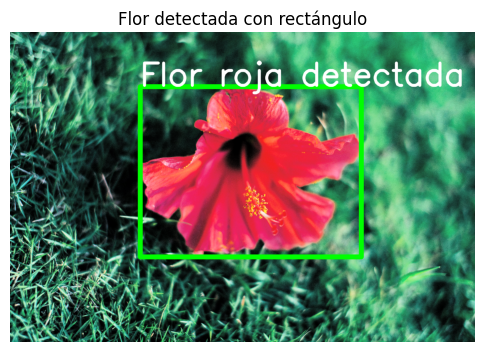

In [ ]:
ejercicio_rectangulo_en_original()

#6 Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

# Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución